In [1]:
from psicrometria import PsicrometryPoint, PsicrometryChart
Celsius0 = 273.15

# Questão 1

Aqui resolveremos a questão 1 da prova A de instalações termomecânicas 2

Temos os pontos na carta psicrométrica

* Ponto A:
   * **T**emperatura de **B**ulbo **S**eco: **TBS** $= 30 \ ^o\text{C}$
   * **U**midade **R**elativa: **UR** $= 30\% = 0.30$
* Ponto B:
   * **T**emperatura de **B**ulbo **U**mido: **TBU** $= 30 \ ^o \text{C}$
   * **T**emperatura de **P**onto de **O**rvalho: **TPO** $ = 21 \ ^o\text{C}$
* Ponto C:
   * **P**ressão Parcial de Agua (**w**ater): **Pw** $ = 1300 \ \text{Pa}$
   * **U**midade **R**elativa: **UR** $= 70\% = 0.70$

In [2]:
A = PsicrometryPoint(TBS = 30+Celsius0, UR = 0.30)
B = PsicrometryPoint(TBU = 30+Celsius0, TPO = 21+Celsius0)
C = PsicrometryPoint(Pw = 1300, UR = 0.70)

Agora, seja o ponto E o ponto saturado de mesma temperatura de bulbo úmido que o ponto A.

$$
\text{TBU}_{E} = \text{TBU}_{A}
$$

Para o ponto D, com uma eficiência $\varepsilon$, ele ficará entra a linha de A e E, de tal modo

$$
\text{TBS}_{D} = \varepsilon \cdot \text{TBS}_{E} + (1-\varepsilon) \cdot \text{TBS}_{A}
$$

Como o ponto E está saturado $\left(\text{UR}_{E} = 1\right)$, então 

$$
\text{TBS}_{E} = \text{TBU}_{E}
$$

Então reescrevemos a equação da evaporação

$$
\text{TBS}_{D} = \varepsilon \cdot \text{TBU}_{A} + (1-\varepsilon) \cdot \text{TBS}_{A}
$$

* Se $\varepsilon = 0$, continua-se na temperatura $\text{TBS}_A$. 
* Se $\varepsilon = 1$, então se atinge a temperatura $\text{TBU}_{A}$

In [3]:
TBSA = A.get("TBS")
TBUA = A.get("TBU")

Do enunciado, teremos uma eficiência $\varepsilon = 0.75$ do resfriamento evaporativo

In [4]:
epsilon = 0.75
TBSD = epsilon * TBUA + (1-epsilon) * TBSA

Podemos então definir o ponto D usando a temperatura de bulbo seco $\text{TBS}_{D}$ e a temperatura de bulbo úmido, que é igual à de A:


In [5]:
D = PsicrometryPoint(TBS=TBSD, TBU=TBUA)

Podemos marcar o ponto E para ilustração:

In [6]:
E = PsicrometryPoint(TBU=TBUA, UR=1)

Agora plotamos o gráfico psicrométrico.
Como pegamos diversos pontos para plotar, ele pode demorar um pouco.
Após terminar, ele gera um PDF ```CartaPsicrometrica.pdf``` e um PNG ```CartaPsicrometrica.png```, que tem maior resolução e pode anexar caso necessário.
Eles se encontram junto com os outros arquivos.

c:\Users\Carlos\Documents\Git\UnB-Courses\instalacoes2\psicrometria.py:417: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("CartaPsicrometrica.pdf", dpi=1600, papertype="a4")


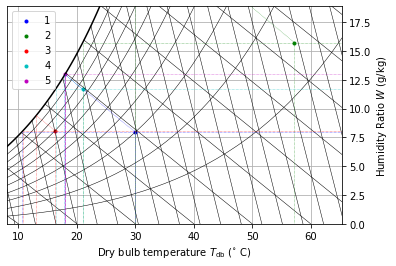

In [7]:
PsicrometryChart([A, B, C, D, E]).plot()

Agora pegamos os valores de todos os pontos

In [8]:
# Entalpias
hA = A.get("h")
hB = B.get("h")
hC = C.get("h")
hD = D.get("h")
hE = E.get("h")

# Temperatura de Bulbo Seco
TBSA = A.get("TBS")-Celsius0
TBSB = B.get("TBS")-Celsius0
TBSC = C.get("TBS")-Celsius0
TBSD = D.get("TBS")-Celsius0
TBSE = E.get("TBS")-Celsius0

# Temperatura de Bulbo Umido
TBUA = A.get("TBU")-Celsius0
TBUB = B.get("TBU")-Celsius0
TBUC = C.get("TBU")-Celsius0
TBUD = D.get("TBU")-Celsius0
TBUE = E.get("TBU")-Celsius0

# Temperatura de Ponto de Orvalho
TPOA = A.get("TPO")-Celsius0
TPOB = B.get("TPO")-Celsius0
TPOC = C.get("TPO")-Celsius0
TPOD = D.get("TPO")-Celsius0
TPOE = E.get("TPO")-Celsius0

# Umidade Relativa
URA = A.get("UR")
URB = B.get("UR")
URC = C.get("UR")
URD = D.get("UR")
URE = E.get("UR")

# Umidade Absoluta
wA = A.get("w")
wB = B.get("w")
wC = C.get("w")
wD = D.get("w")
wE = E.get("w")

# Pressão Parcial de vapor de agua
PwA = A.get("Pw")
PwB = B.get("Pw")
PwC = C.get("Pw")
PwD = D.get("Pw")
PwE = E.get("Pw")

# Volume específico
VA = A.get("V")
VB = B.get("V")
VC = C.get("V")
VD = D.get("V")
VE = E.get("V")

In [9]:
print("         | TBS (oC) | TBU (oC) | UR (%) | h (J/kg) | TPO (oC) | w (g/kg) |  Pw (Pa)  | V (m^3/kg) |")
print(" Ponto A |  %.3f  |  %.3f  | %.3f |  %.3f  |  %.3f  |   %.3f  |  %.3f |   %.3f   |" % (TBSA, TBUA, 100*URA, hA/1000, TPOA, 1000*wA, PwA, VA))
print(" Ponto B |  %.3f  |  %.3f  | %.3f |  %.3f  |  %.3f  |  %.3f  |  %.3f |   %.3f   |" % (TBSB, TBUB, 100*URB, hB/1000, TPOB, 1000*wB, PwB,VB))
print(" Ponto C |  %.3f  |  %.3f  | %.3f |  %.3f  |  %.3f  |   %.3f  |  %.3f |   %.3f   |" % (TBSC, TBUC, 100*URC, hC/1000, TPOC, 1000*wC, PwC,VC))
print(" Ponto D |  %.3f  |  %.3f  | %.3f |  %.3f  |  %.3f  |  %.3f  |  %.3f |   %.3f   |" % (TBSD, TBUD, 100*URD, hD/1000, TPOD, 1000*wD, PwD,VD))
print(" Ponto E |  %.3f  |  %.3f  | %.2f |  %.3f  |  %.3f  |  %.3f  |  %.3f |   %.3f   |" % (TBSE, TBUE, 100*URE, hE/1000, TPOE, 1000*wE, PwE,VE))

         | TBS (oC) | TBU (oC) | UR (%) | h (J/kg) | TPO (oC) | w (g/kg) |  Pw (Pa)  | V (m^3/kg) |
 Ponto A |  30.000  |  17.961  | 30.000 |  50.513  |  10.553  |   7.955  |  1279.654 |   0.870   |
 Ponto B |  57.186  |  30.000  | 14.206 |  98.550  |  21.000  |  15.724  |  2498.534 |   0.959   |
 Ponto C |  16.263  |  13.059  | 70.000 |  36.809  |  10.790  |   8.083  |  1300.000 |   0.830   |
 Ponto D |  20.971  |  17.961  | 75.011 |  50.796  |  16.378  |  11.700  |  1870.852 |   0.849   |
 Ponto E |  17.961  |  17.961  | 100.00 |  50.891  |  17.961  |  12.959  |  2068.184 |   0.841   |


Como mostra os resultados acima, temos a tabela com os valores

|         | TBS ($^o\text{C}$) | TBU ($^o\text{C}$) |  UR (%)  | h (kJ/kg) |  TPO ($^o\text{C}$) |  w (g/kg)  | Pw (Pa) |
|--------:|:--------:|:--------:|:--------:|:---------:|:---------:|:----------:|:----------:|
| Ponto A |    30    |  17.961  |    30    |   50.513  |   10.553  |   7.955 |   1279.654 |
| Ponto B |  57.186  |    30    |  14.206  |   98.550  |   21      |   15.724 |   2498.534 |
| Ponto C |  16.263  |  13.059  |    70  |   36.809  |   10.790      |   8.083 |   1300 |
| Ponto D |  30.000  |  30.000  | 75.669 |  50.799  |  16.428  |  11.737  |  1876.781 |
| Ponto E |  57.186  |  13.059  | 100.00 |  50.513  |  17.841  |  12.859  |  2052.535 |

# Questão 3

Para a questão 2, temos dois pontos no mapa psicrométrico

* Ponto **A**
    * **T**emperatura de **B**ulbo **S**eco: **TBS** $= 36 \ ^o\text{C}$
    * **U**midade **R**elativa: **UR** $= 50\% = 0.50$

* Ponto **B**
    * **T**emperatura de **B**ulbo **S**eco: **TBS**$=22 \ ^o\text{C}$
    * **U**midade **R**elativa: **UR** $ = 84\% = 0.84$



In [10]:
A = PsicrometryPoint(TBS=36+Celsius0, UR=0.50)
B = PsicrometryPoint(TBS=22+Celsius0, UR=0.84)

Além disso, temos uma vazão de ar de $\dot{V}_{ar} = 15 \ \text{m}^3/\text{s}$.

In [11]:
Vdotar = 15

Agora vamos às contas:

Primeiro pegamos o volume específico no ponto **A**

In [12]:
vA = A.get("V")
vB = B.get("V")
v = (vA+vB)/2
print("Volume específico de ar:")
print("     vA = %.3f m^3/kg" % vA)

Volume específico de ar:
     vA = 0.902 m^3/kg


Agora calculamos a massa de ar $\dot{m}_{ar}$ usando o volume específico

$$
\dot{m}_{ar} = \dfrac{\dot{V}_{ar}}{v_{ar}}
$$

In [13]:
mdotar = Vdotar/vA
print("Massa de ar por segundo:")
print("    m dot ar = %.3f kg/s" % mdotar)
print("             = %.3f g/s" % (mdotar*1000))

Massa de ar por segundo:
    m dot ar = 16.628 kg/s
             = 16627.743 g/s


Calculamos a variação de entalpia $\Delta h$ e a variação de agua $\Delta w$ por unidade de massa de ar seco

$$
\Delta h = h_{A}-h_{B}
$$
$$
\Delta w = w_{A} - w_{B}
$$

In [14]:
Deltah = A.get("h") - B.get("h")
Deltaw = A.get("w") - B.get("w")
print("Variacao de entalpia:")
print("   Delta h = %.3f J/kg" % Deltah)
print("           = %.3f kJ/kg" % (Deltah/1000))
print("Variacao de massa de agua por quilo de agua:")
print("   Delta w = %.3f kg/kg" % Deltaw)
print("           = %.3f g/kg" % (1000*Deltaw))

Variacao de entalpia:
   Delta h = 27009.845 J/kg
           = 27.010 kJ/kg
Variacao de massa de agua por quilo de agua:
   Delta w = 0.005 kg/kg
           = 4.891 g/kg


Podemos então calcular o calor retirado e agua que sai por segundo:

$$
\dot{Q}_{frio} = \dot{m} \cdot \Delta h
$$
$$
\dot{m}_{agua} = \dot{m} \cdot \Delta w
$$

In [15]:
Qdotfrio = mdotar * Deltah
mdotagua = mdotar * Deltaw
print("Calor retirado:")
print("   Q dot frio = %.3f J/s" % Qdotfrio)
print("              = %.3f kJ/s" % (Qdotfrio/1000))
print("Variacao de massa de agua por quilo de agua:")
print("   m dot agua = %.3f kg/s" % mdotagua)
print("              = %.3f g/s" % (1000*mdotagua))

Calor retirado:
   Q dot frio = 449112.762 J/s
              = 449.113 kJ/s
Variacao de massa de agua por quilo de agua:
   m dot agua = 0.081 kg/s
              = 81.321 g/s


Como temos a conversão de

$$
1 \ \left[\text{TR}\right] = \dfrac{65941}{18750} \ \left[\text{kW}\right] \approx 3.51 \ \left[\text{kW}\right]
$$

Então temos a quantidade de calor dada em TR por

$$
\dot{Q}_{frio} \ \left[\text{TR}\right] = \dfrac{1}{3.51} \cdot \dot{Q}_{frio} \ \left[\text{kW}\right]
$$

In [16]:
print("Calor retirado:")
print("   Q dot frio = %.3f kW/s" % (Qdotfrio/1000))
print("              = %.3f TR" % (Qdotfrio/3510))

Calor retirado:
   Q dot frio = 449.113 kW/s
              = 127.952 TR


Plotando a carta psicrométrica com os dois pontos analisados

c:\Users\Carlos\Documents\Git\UnB-Courses\instalacoes2\psicrometria.py:417: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("CartaPsicrometrica.pdf", dpi=1600, papertype="a4")


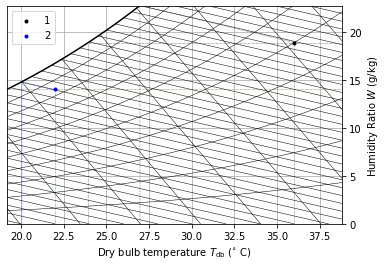

In [17]:
PsicrometryChart([A, B]).plot()

Esse valor obtido acima desconsidera a entalpia da agua, que iremos calcular a seguir.
Para isso, partiremos da configuração da Figura abaixo.

![Picture title](https://github.com/carlos-adir/UnB-Courses/blob/main/instalacoes2/esquema-mistura-gases.png?raw=true)

A princípio entrou uma quantidade $\dot{m}_{ar,d}$ a uma temperatura $\text{TBS}_{A}$.
Então essa massa de ar foi esfriada até o ponto de orvalho **C**, trocando apenas calor latente,



In [18]:
TPOA = A.get("TPO")
wA = A.get("w")
print("TPOA = %.3f oC" % (TPOA-Celsius0))
C = PsicrometryPoint(TPO=TPOA, UR=1)

TPOA = 23.940 oC


Então diminuiu-se a temperatura até a temperatura $\text{TBU}_{D}$, onde o ponto **D** é um ponto saturado tal que $\overline{DBA}$ é uma linha reta, pra usarmos a **Lei da Linha Reta**.

Para encontrar o ponto **D**, podemos fazer iterações, mas iremos utilizar outro método.
Digamos que tenhamos uma função $w(TBS)$ (saturado) em um intervalo como $\left[-50 \ ^o\text{C}, \text{TPO}_{A}\right]$.
Vamos plotar o gráfico

In [19]:
import numpy as np
TPOA = A.get("TPO")
TBSfunc = np.linspace(-50+Celsius0, TPOA, 129)
wfunc = np.zeros(TBSfunc.shape)
for i, TBSi in enumerate(TBSfunc):
    P = PsicrometryPoint(TBS=TBSi, UR=1)
    wfunc[i] = P.get("w")

Agora chamamos de

$$
\tan \phi = \dfrac{w_{A}-w_{B}}{\text{TBS}_{A}-\text{TBS}_{B}}
$$

$$
\tan \theta = \dfrac{w_{A}-w}{\text{TBS}_{A}-\text{TBS}}
$$

Queremos encontrar o valor de $\text{TBS}$ quando $\tan \phi = \tan \theta$

In [20]:
wA = A.get("w")
wB = B.get("w")
TBSA = A.get("TBS")
TBSB = B.get("TBS")
tanphi = (wA-wB)/(TBSA-TBSB)
tantheta = np.zeros(TBSfunc.shape)
for i, (TBSi, wi) in enumerate(zip(TBSfunc, wfunc)):
    tantheta[i] = (wA-wi)/(TBSA-TBSi)

E agora plotamos o gráfico para vermos a interseção.

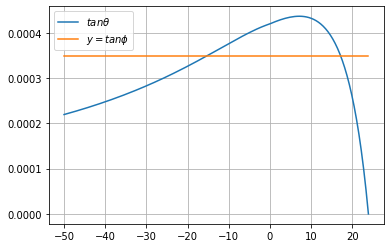

In [21]:
from matplotlib import pyplot as plt
plt.plot(TBSfunc-Celsius0, tantheta, label=r"$tan \theta$")
plt.plot(TBSfunc-Celsius0, tanphi*np.ones(TBSfunc.shape), label=r"$y = tan \phi$")
plt.legend()
plt.grid()

Agora, como vemos as soluções, iremos pegar a de temperatura mais alta.
Para descobrir o valor, vemos pelo grafico que está entre $\left[-10, 20\right]$.
Agora fazemos uma busca binária

In [22]:
if tanphi < np.min(tantheta) or tanphi > np.max(tantheta):
    raise Exception("Nao existe solucao!")

In [23]:
TBSmin = -10+Celsius0
TBSmax = TPOA
while TBSmax - TBSmin > 1e-3:  # queremos erro na temperatura de no maximo 0.001
    TBSM = (TBSmin+TBSmax)/2
    M = PsicrometryPoint(TBS=TBSM, UR=1)
    wM = M.get("w")
    tantheta = (wA-wM)/(TBSA-TBSM)
    if tantheta < tanphi:
        TBSmax = TBSM
    else:
        TBSmin = TBSM
print("TBSM = %.3f oC" % (TBSM-Celsius0))

TBSM = 17.175 oC


Então conseguimos o ponto **D**

In [24]:
D = PsicrometryPoint(TBS=TBSM, UR=1)
TBSD = D.get("TBS")
wD = D.get("w")
print("TBSD = %.3f oC" % (TBSD-Celsius0))

TBSD = 17.175 oC


Então usando a **Lei da Linha Reta**, teremos as frações de ar que foram resfriadas e que passaram direto.

$$
f_{resfriado} = \dfrac{\text{TBS}_{A}-\text{TBS}_{B}}{\text{TBS}_{A}-\text{TBS}_{D}}
$$
$$
f_{direto} = \dfrac{\text{TBS}_{B}-\text{TBS}_{D}}{\text{TBS}_{A}-\text{TBS}_{D}}
$$

In [25]:
fresf = (TBSA-TBSB)/(TBSA-TBSD)
fdire = (TBSB-TBSD)/(TBSA-TBSD)
print("Parte resfriada: f resf = %.4f" % fresf)
print("   Parte direta: f direta = %.4f" % fdire)

Parte resfriada: f resf = 0.7437
   Parte direta: f direta = 0.2563


Agora temos as proporções de massa refrigeradas:

$$
\dot{m}_{ar, resf} = \dot{m}_{ar} \cdot f_{resfriado}
$$
$$
\dot{m}_{ar, dire} = \dot{m}_{ar} \cdot f_{direto}
$$

In [26]:
mdotarresf = mdotar * fresf
mdotardire = mdotar * fdire

print("Massa total de ar:")
print("    m dot ar = %.3f kg/s" % mdotar)
print("Massa total resfriada:")
print("  m dot ar b = %.3f kg/s" % mdotarresf)
print("Massa total direta:")
print("  m dot ar d = %.3f kg/s" % mdotardire)

Massa total de ar:
    m dot ar = 16.628 kg/s
Massa total resfriada:
  m dot ar b = 12.366 kg/s
Massa total direta:
  m dot ar d = 4.262 kg/s


Agora temos as variações de entalpia:

$$
\Delta h_{A \to C} = h_{A} - h_{C}
$$
$$
\Delta h_{C \to D} = h_{C} - h_{D}
$$

In [27]:
DeltahAC = A.get("h") - C.get("h")
DeltahCD = C.get("h") - D.get("h")

Cause:  Sorry, but cannot provide two inputs that are both water-content (humidity ratio, relative humidity, absolute humidity :: inputs were:"H","P",1.0132500000000000e+05,"D",2.9709018111838236e+02,"R",1.0000000000000000e+00 


Calculamos a variação de energia pela parte resfriada:

$$
\dot{Q}_{frio} = \dot{m}_{ar, resf} \cdot \Delta h_{A \to C} + \dot{m}_{ar, resf} \cdot \Delta h_{C \to D} + \dot{m}_{agua}\cdot \Delta h_{agua}
$$

In [28]:
TBSC = C.get("TBS")
TBSD = D.get("TBS")
print("TBSC = %.3f oC" % (TBSC-Celsius0))
print("TBSD = %.3f oC" % (TBSD-Celsius0))
haguaC = PropsSI('H','P',101325,'T',TBSC,'Water')
haguaD = PropsSI('H','P',101325,'T',TBSD,'Water')
# Deltahagua = haguaC - haguaD
Deltahagua = PropsSI('H','P',101325,'T',TBSA,'Water')
print("Delta h agua = %.3f kJ/kg" % (Deltahagua/1000))

TBSC = 23.940 oC
TBSD = 17.175 oC


NameError: name 'PropsSI' is not defined

In [ ]:
Qdotfrio = mdotarresf * DeltahAC
Qdotfrio += mdotarresf * DeltahCD
Qdotfrio += mdotagua * Deltahagua
print("Qdot frio = %.3f kW" % (Qdotfrio/1000))
print("          = %.3f TR" % (Qdotfrio/3510))

In [ ]:
chart = PsicrometryChart([A,B,C,D])
chart.plot()
axis = chart.axis
axis.plot((TBSD-Celsius0, TBSA-Celsius0), (1000*wD, 1000*wA))


## Disponível online

Esse python notebook está disponível online no GitHub através do link:

* [GitHub/carlos-adir/UnB-Courses/instalacoes2/ProvaA-2022EAD](https://github.com/carlos-adir/UnB-Courses/blob/main/instalacoes2/ProvaA-2022EAD.ipynb)